### Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

### Dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Pequena Exploração

In [3]:
print('Número de imagens e tamanhos')
imagens_treino.shape, imagens_teste.shape, imagens_teste.shape, identificacoes_teste.shape

Número de imagens e tamanhos


((60000, 28, 28), (10000, 28, 28), (10000, 28, 28), (10000,))

### Exibição

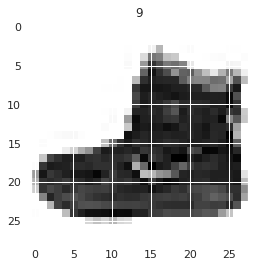

In [4]:
plt.title(identificacoes_treino[0])
plt.imshow(imagens_treino[0], cmap='binary')

In [5]:
print(identificacoes_treino.min(), identificacoes_treino.max())

0 9


In [6]:
# nomes das classificações retiradas do github original do dataset
nomes_classificacoes = ['camiseta','calca', 'pullover','vestido', 
                        'casaco','sandalia','camisa','tenis','bolsa','bota']

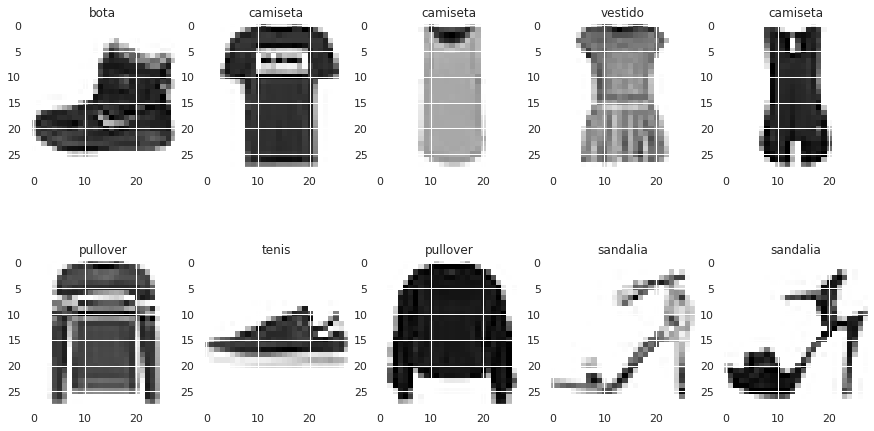

In [7]:
plt.figure(figsize=(15,8))
for imagem in range(10):
    plt.subplot(2,5,imagem+1)
    plt.title(nomes_classificacoes[identificacoes_treino[imagem]])
    plt.imshow(imagens_treino[imagem], cmap='binary')

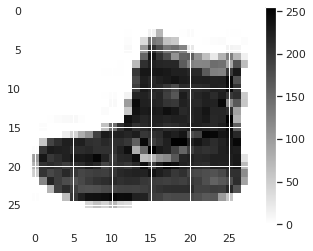

In [8]:
plt.imshow(imagens_treino[0], cmap='binary')
plt.colorbar()

In [9]:
imagens_treino = imagens_treino/255. #normalização

### Criação do modelo

In [10]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

In [11]:
modelo_sem_camada_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

A adição da camada Dropout na rede ajuda com o problema de overfitting.<br/>
Neste caso melhorou a acurácia do modelo e a sua perda, como é demonstrado abaixo

In [12]:
modelo.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
modelo_sem_camada_dropout.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [13]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6597 - accuracy: 0.7684 - val_loss: 0.3972 - val_accuracy: 0.8561
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4093 - accuracy: 0.8532 - val_loss: 0.3914 - val_accuracy: 0.8557
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3681 - accuracy: 0.8658 - val_loss: 0.3554 - val_accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3438 - accuracy: 0.8741 - val_loss: 0.3415 - val_accuracy: 0.8780
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3231 - accuracy: 0.8809 - val_loss: 0.3283 - val_accuracy: 0.8805


In [14]:
historico_sem_droput = modelo_sem_camada_dropout.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6280 - accuracy: 0.7813 - val_loss: 0.4127 - val_accuracy: 0.8483
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3882 - accuracy: 0.8613 - val_loss: 0.3754 - val_accuracy: 0.8625
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3438 - accuracy: 0.8731 - val_loss: 0.3524 - val_accuracy: 0.8728
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3095 - accuracy: 0.8840 - val_loss: 0.3608 - val_accuracy: 0.8690
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2925 - accuracy: 0.8929 - val_loss: 0.3204 - val_accuracy: 0.8825


In [15]:
def show_history(history):
    plt.figure(figsize=(8,12))
    plt.subplot(2, 1, 1)
    plt.title('Acurácia por Épocas')
    plt.plot(history['accuracy'], label='treino')
    plt.plot(history['val_accuracy'], label='validação')
    plt.ylabel('Acurácia')
    plt.xlabel('Épocas')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.title('Perda por Épocas')
    plt.plot(history['loss'], label='treino')
    plt.plot(history['val_loss'], label='validação')
    plt.ylabel('Perda')
    plt.xlabel('Épocas')
    plt.legend()

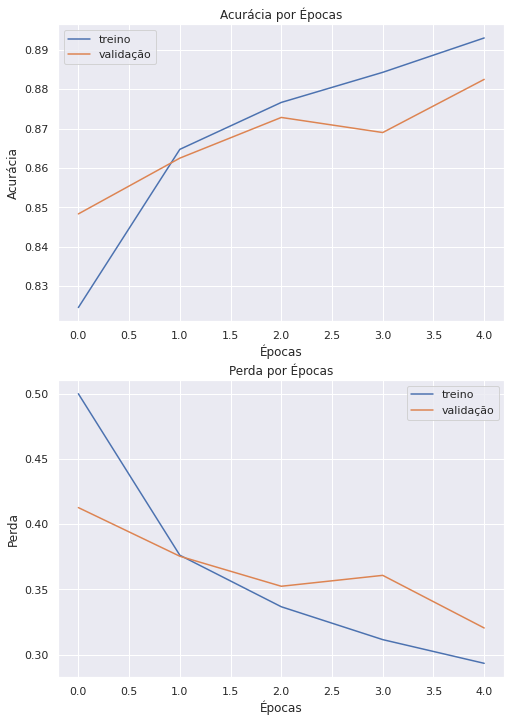

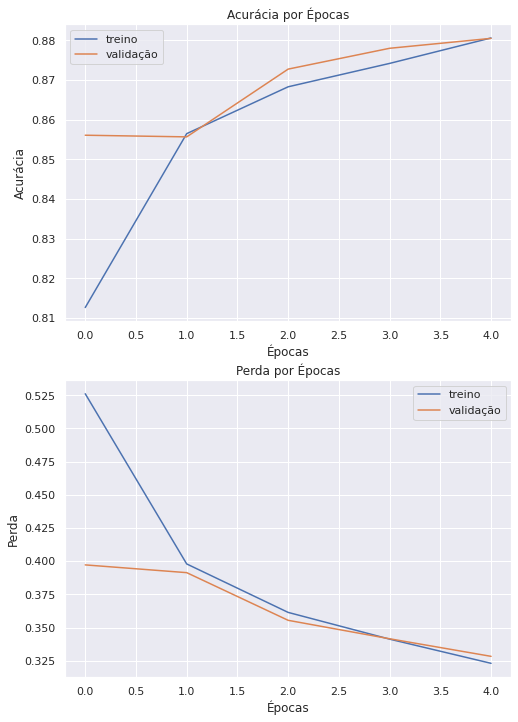

In [16]:
show_history(historico_sem_droput.history)
show_history(historico.history)


In [17]:
testes = modelo.predict(imagens_teste)

In [18]:
elemento = 1
print(f'resultado teste {np.argmax(testes[elemento])}')
print(f'número da imagem de teste {identificacoes_teste[elemento]}')

resultado teste 2
número da imagem de teste 2


In [19]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'perda do teste: {perda_teste}')
print(f'acuracia do teste: {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 52.9319 - accuracy: 0.8568
perda do teste: 52.93189239501953
acuracia do teste: 0.8568000197410583


### Sumário Modelo

In [20]:
sumario_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


quantidade de parametros na camada Dense é de 200960 = (784 --> inputs + 1 --> viéses) * 256 

### Pesos Camada Dense

In [21]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.07196401,  0.12249152, -0.15530986, ...,  0.12258881,
         0.02023622, -0.06565101],
       [-0.00947258, -0.06033691,  0.0974308 , ...,  0.05994521,
         0.0309875 , -0.07530174],
       [ 0.02293893, -0.06032376,  0.01819681, ..., -0.01919277,
         0.23298633, -0.05541648],
       ...,
       [ 0.05623642, -0.09326908,  0.03570564, ..., -0.02653573,
        -0.09883466, -0.11203273],
       [-0.01793925,  0.04405503, -0.29692832, ...,  0.01287268,
        -0.12383302,  0.00823421],
       [ 0.04142669, -0.05757616, -0.3040883 , ...,  0.00447518,
        -0.16462724,  0.01860651]], dtype=float32)

In [22]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([ 0.35240906,  0.17825389,  0.12494808,  0.04801558,  0.3041601 ,
       -0.02655475, -0.02795115,  0.29876065, -0.00954571,  0.08110325,
        0.25123692,  0.22962986,  0.04424337, -0.05298712,  0.06116468,
       -0.01775678,  0.30946955,  0.04198372, -0.0314674 , -0.01391368,
        0.18808857,  0.07949729, -0.01310266,  0.11892829,  0.26067108,
       -0.11552233, -0.17750053, -0.01188583,  0.07937071, -0.01253293,
       -0.03664223,  0.15288132, -0.01127317,  0.22720985,  0.11444162,
       -0.15061282,  0.08666423,  0.18858975, -0.03292238, -0.01217005,
        0.24149498,  0.30368623,  0.21333897, -0.01107829, -0.2281574 ,
        0.16860126,  0.26127344, -0.10017488,  0.24439718,  0.16990003,
        0.1664082 ,  0.25602224,  0.12390032,  0.34428376, -0.04424292,
       -0.07859632,  0.29559252,  0.24830776,  0.01250515, -0.01554095,
       -0.15882887,  0.03310909,  0.35319674,  0.01872994, -0.00520402,
       -0.05023164,  0.27681962,  0.17187522,  0.11487662,  0.07

Zerando os pesos da rede na camada dense <br>
No caso da adição de valores aleatorios para os pesos da camada dense foi mostrado o problema de **Vanishing Gradient**

In [30]:
pesos_camada_dense_zerados = np.zeros(pesos_camada_dense.shape)
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])
modelo.layers[1].get_weights()[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
modelo.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7895 - accuracy: 0.7166 - val_loss: 0.4147 - val_accuracy: 0.8499
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4248 - accuracy: 0.8470 - val_loss: 0.4024 - val_accuracy: 0.8553
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3885 - accuracy: 0.8580 - val_loss: 0.3769 - val_accuracy: 0.8631
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3600 - accuracy: 0.8679 - val_loss: 0.3598 - val_accuracy: 0.8708
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3407 - accuracy: 0.8764 - val_loss: 0.3636 - val_accuracy: 0.8652


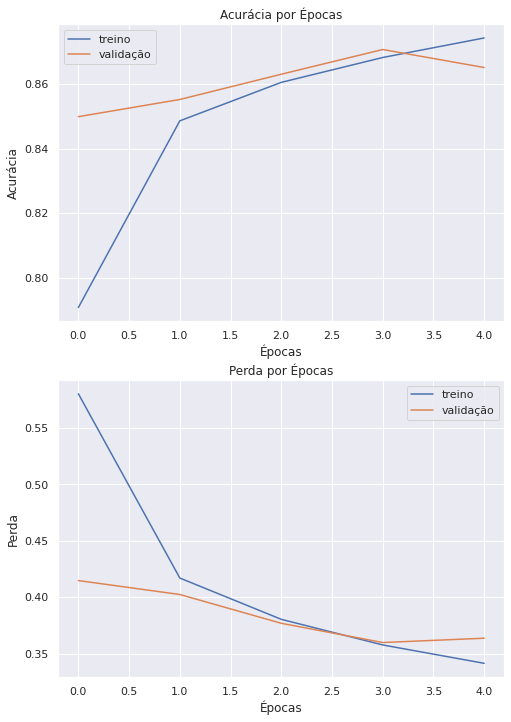

In [32]:
# resultado para o modelo iniciando com pesos zerados
show_history(historico.history)

Inicializando a rede com os pesos zerados resulta numa pequena piora do modelo, visto que a acurácia e a perda melhoram para os dados de treino e não para os de validação. Neste caso, quebrar a simetria da rede pode nos dar melhores resultados

In [33]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

Algoritmo para a inicialização dos pesos: GlorotUniform <br>
Encontrado nas configurações da rede:
**kernel_initializer': {'class_name': 'GlorotUniform'...**


### Salvando e usando o modelo pronto

In [34]:
modelo.save('modelo.h5')

In [35]:
from tensorflow.keras.models import load_model
modelo_salvo = load_model('modelo.h5')

In [36]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'resultado teste modelo salvo {np.argmax(testes[elemento])}')
print(f'número da imagem de teste do modelo salvo {identificacoes_teste[elemento]}')

resultado teste modelo salvo 2
número da imagem de teste do modelo salvo 2
